**<span style="color:orange; font-size:18px;">About This Dataset:</span>**

- The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and **can also be found on the UCI Machine Learning Repository**.

- It includes **three iris species with 50 samples each** as well as some properties about each flower. *One flower species is linearly separable from the other two, but the other two are not linearly separable from each other*

- The columns in this dataset are: **Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species**

- **UCI Machine Learning Repository** Link: *https://archive.ics.uci.edu/dataset/53/iris*

- **Kaggle** Dataset Link: *https://www.kaggle.com/datasets/uciml/iris*

**<span style="color:orange; font-size:18px;">Purpose of Analysis:</span>**

- Solve a **classification** problem by using **machine learning**

- Accurately classify the 3 types of **Iris species**: *Setosa, Versicolor, and Virginica* 

- Explore the relationships between **sepal and petal dimensions**

- Evaluate the effects of **feature selection** on our model's performance

**Now, Let's begin!**

**<span style="color:orange; font-size:18px;">Read in the required modules and change our default pandas settings:</span>**

In [190]:
#  Use the "try" flow control argument to "try" and import all of our required modules
try:
    #  Import basic operating system packages
    #  Import os for getting the current working directory
    import os
                                        
    #  Import math and statistics packages
    #  Import "pandas" for data manipulation and analysis, rename it to "pd"
    import pandas as pd
    #  Import "numpy" for numerical computations, rename it to "np"
    import numpy as np

    #  Now, import Machine Learning packages
    #  Import "train_test_split" from sklearn's .model_selection method, used to split data into training and testing sets when creating predictive models
    from sklearn.model_selection import train_test_split
    #  Import the "RandomForestClassifier" algorithm from sklearn's .ensemble method, used to create classification models with the RandomForest method
    from sklearn.ensemble import RandomForestClassifier
    #  Import "accuracy_score" from sklearn's .metrics method (to evaulate classification models by comparing correct vs. incorrect predictions), and "classification_report" to get a summary of the precision, recall, and F1-scores
    from sklearn.metrics import accuracy_score, classification_report
    #  Import "ConfusionMatrixDisplay" and "confusion_matrix" from sklearn's .metrics method, used in categorical/classification AND continuous models to evaluate performance (i.e. accuracy and recall)
    from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
    #  Import graph_from_dot_data from pydotplus to visualize decision trees (aka. Classification and Regression Trees or CARTs)
    from pydotplus import graph_from_dot_data
    #  From sklearn's '.tree' method import 'export_graphviz' to export our decision tree (the tree used for the model) as 'DOT' format
    from sklearn.tree import export_graphviz

    #  If all module imports are successful print the statement 
    print('All modules successfully imported!')

#  Use an "except" clause to escape the "try" flow control argument if there is an error - and rename the error to 'moderror'
except ModuleNotFoundError as moderror:
    print(f"Module failed to import: {moderror.name}")

All modules successfully imported!


In [192]:
#  Use the "try" flow control argument to "try" and change our viewing settings (using pandas/pd) for the IDE
try:
    # Change pandas default display settings (using pd.set_option()) for JuptyerLab so that our datasets can be fully displayed in our IDE
    pd.set_option('display.max_columns', None)   # Ensure we can see all of our data (column-wise)
    pd.set_option('display.width', 1000)         # Ensure we can see all of our data (viewing width **None is not a valid parameter**)
    pd.set_option('display.max_rows', 50)       # Ensure we can see a large enough sample of our data (300 rows)

    # Print our success message for user feedback
    print('Display settings successfully applied...')

#  Use an "except" clause to escape the "try" flow control argument if there is an error - and rename the error to 'moderror'
except NameError:
    print('Error: Pandas (\'pd\') is not defined. Ensure that pandas is imported using: import pandas as pd')

#  Use an "except" clause to escape the "try" flow control argument if there is an error - and rename the error to 'moderror'
except AttributeError:
    print('Error: \'pd\' exists, but isn\'t recognized as pandas. Please check your import statement and ensure that pandas is installed correctly, and isn\'t assigned to anything else (variables).')
    
#  Use an "except" clause to escape the "try" flow control argument if there is an error - and rename the error to 'moderror'
except Exception as ex:
    print('Unexpected error: ' + str(ex))

Display settings successfully applied...


**<span style="color:red; font-size:18px;">Initialize our filepath variable and locate the dataset:</span>**

In [195]:
# Initialize our CSV file path (Iris)
irisFilePath = r'C:\Users\jackn\Desktop\Projects\Portfolio\ML\Iris.csv'

In [197]:
# Attempt to locate the dataset (using os.path.exists()) via the provided file path (located in the cell above)
if not os.path.exists(irisFilePath):
    # Print our our error message for our user if the file path is NOT found (concatenate our filePath variable to string)
    print('Error - the file at: ' + irisFilePath + ' was not found!')
    
# Otherwise, if our file is located
else:
    # Print our success message for user feedback
    print('Dataset successfully located.')

Dataset successfully located.


**<span style="color:red; font-size:18px;">Use pandas (and our file path variable) to read our file:</span>**

In [200]:
#  Use the "try" flow control argument to "try" and read our selected file
try:
    # Use pandas (alias = pd) to read our CSV file, getting our iris data. Then, store this data in a new variable (i.e., irisDf)
    irisDf = pd.read_csv(irisFilePath)
    # If the Iris dataset was located and successfully loaded, inform the user with a success message
    print(f"Iris data is now sucessfully loaded.")

#  Otherwise, use an "except" clause to leave the "try" flow control argument. If there is an error, rename the error to 'fileError'
except FileNotFoundError as fileError:
    # Print out the error message for our user (a combo of string and our new exception variable 'ex')
    print(f"Error locating iris data! File cannot be found at path: {fileError.filename}")

Iris data is now sucessfully loaded.


**<span style="color:Green; font-size:18px;">Now let's do some EDA and view the important characteristics of our dataset:</span>**

In [203]:
# Get the dataset's information using pandas' '.info()' function (shows columns, non-null counts, data types, and memory usage)
print(irisDf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [205]:
# Use pandas' '.describe()' function to see descriptive statistics (mean, st.dev, min, max, and quartiles)
print(irisDf.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [207]:
# View the columns of the iris dataset
print(irisDf.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')


In [209]:
# Check for any missing values in our dataset
print(irisDf.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [211]:
# Check the distribution of each class (how many observations are found for each species of Iris plant)
print(irisDf['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [213]:
# View the FIRST five rows of our dataset
print('FIRST five rows of data: ' + '\n' + '\n' + str(irisDf.head()) + '\n' + '\n')

# View the LAST five rows of our dataset
print('LAST five rows of data: ' + '\n' + '\n' + str(irisDf.tail()))

FIRST five rows of data: 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


LAST five rows of data: 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145  146            6.7           3.0            5.2           2.3  Iris-virginica
146  147            6.3           2.5            5.0           1.9  Iris-virginica
147  148            6.5           3.0            5.2           2.0  Iris-virginica
148  149            6.2           3.4            5.4           2.3  Iris-virginica
149  150            5.9           3.0            5.1           1.8  

**<span style="color:Yellow; font-size:18px;">Now it's time to build our predictive model:</span>**

- First, define our feature and target variables

- Then, split the dataset into training and testing sets

- Next, fit the model to our data

- Finally, evaluate our model's performance

In [216]:
# Define our 'X' (feature) and 'Y' (target) variables
X = irisDf.drop(columns=['Species', 'Id'])
y = irisDf['Species']

# Print our 'X' feature variables
print('Feature variable\'s columns: ' + '\n' + '\n' + str(X.columns) + '\n')

# Print our 'Y' (target) variable - the variable we want to predict
print('Target variable\'s columns: ' + '\n' + '\n' + str(irisDf[['Species']].columns))

Feature variable's columns: 

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

Target variable's columns: 

Index(['Species'], dtype='object')


In [218]:
# Use sk-learn's train_test_split function to divide our data into training, and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=144)

# Print the 'post-splitting' information about the dataset
print('Dataset split: ' + str(X_train.shape) + ' training samples, and ' + str(X_test.shape) + ' testing samples.')

Dataset split: (120, 4) training samples, and (30, 4) testing samples.


In [220]:
#  Use the "try" flow control argument to "try" and create our model
try:
    # Initialize the RandomForestClassifier model with random_state set to 144
    rf = RandomForestClassifier(random_state=144)

    # Train (fit) the model using the training data
    rf.fit(X_train, y_train)

    # Print a success message for our user
    print("The Random Forest classification model has been successfully trained.")

# Handle any errors (exceptions) that might occur with our generic exception variable 'ex' 
except Exception as ex:
    print('Error occurred while training the model: ' + str(ex))

The Random Forest classification model has been successfully trained.


**<span style="color:Yellow; font-size:18px;">Finally, let's evaluate our predictive model:</span>**

- First, let's examine the **accuracy score** *(% of correct vs incorrect predictions)*

- Next, let's check out the **classification report** *(precision, accuracy, recall, and F-1 score)*

- After creating our classification report, we can **visualize our models performance** on different classes with a **confusion matrix** *(for both training and testing datasets)*

- Then, we can visualize ***one*** of the many decision trees used in our **Random Forest** model to gain insight as to how the model *might* work and **how it makes its predictions**

In [223]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Generate predictions using our trained model
    y_pred = rf.predict(X_test)

    # Calculate the accuracy of our model, storing it in our new variable 'accuracy' (applying the accuracy_score function to our testing set)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score for the model (use '{:.4f}'.format(accuracy) to achieve a 4 decimal place float in the print statement)
    print('Model Accuracy: ' + '{:.4f}'.format(accuracy))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Model Accuracy: 0.9667


In [225]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Generate predictions using our trained model
    y_pred = rf.predict(X_test)

    # Print a detailed classification report
    print('\nClassification Report - Random Forest:\n' + '\n', classification_report(y_test, y_pred))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))


Classification Report - Random Forest:

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



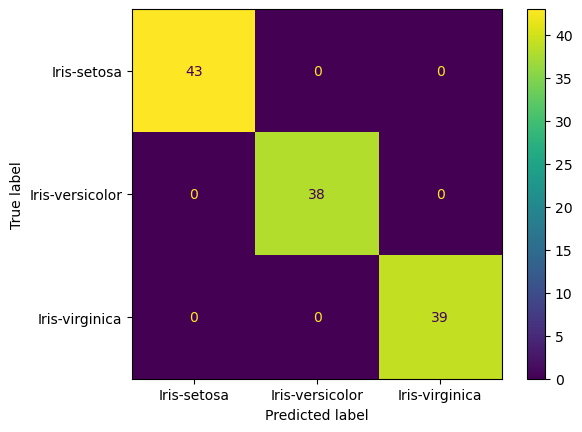

In [237]:
# Use our Random Forest model to predict values (using .predict()) for the TESTING data ('X_train')
y_train_pred = rf.predict(X_train)

# Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_train) and the predicted labels (y_train_pred)
cm = confusion_matrix(y_train, y_train_pred, labels=rf.classes_)

# Now display the confusion matrix (using ConfusionMatrixDisplay())
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

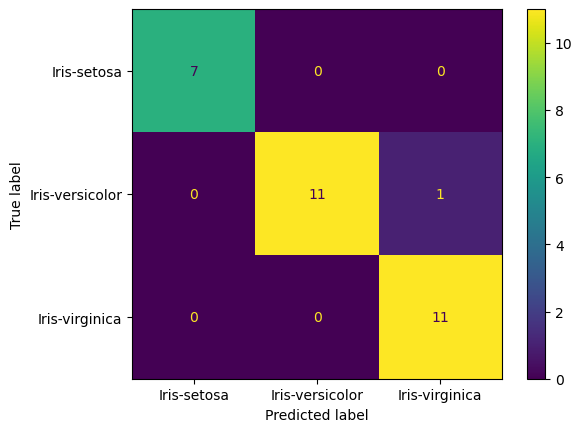

In [239]:
# Use our Random Forest model to predict values (using .predict()) for the TESTING data ('X_train')
y_test_pred = rf.predict(X_test)  # Use the Random Forest model to predict values for the test data

# Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_test) and the predicted labels (y_test_pred)
cmTest = confusion_matrix(y_test, y_test_pred, labels=rf.classes_)  # Generate the confusion matrix

# Now display the confusion matrix (using ConfusionMatrixDisplay()) for the TESTING data
ConfusionMatrixDisplay(confusion_matrix=cmTest, display_labels=rf.classes_).plot()

In [231]:
# Use the "try" flow control argument to "try" and export AND visualize one of our decision trees from the Random Forest model
try:
    # Select the first decision tree from the trained Random Forest model for visualization and export
    tree = rf.estimators_[0]  

    # Generate the decision tree visualization in DOT format
    dot_data = export_graphviz(rf.estimators_[0], out_file=None, 
                               feature_names=X.columns,  
                               class_names=rf.classes_,
                               filled=True, rounded=True, special_characters=True)

    # Convert the DOT data to a Graphviz object
    graph = graph_from_dot_data(dot_data)
    # Save the Graphviz object to a .pdf file
    graph.write_pdf('randomForestTree1.pdf')  

    # Inform the user of successful pdf export
    print("Decision tree successfully saved as 'randomForestTree1.pdf'.")

# Handle any errors (Exceptions) that occur during the export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while generating the decision tree PDF: " + str(ex))

Decision tree successfully saved as 'randomForestTree1.pdf'.


**<span style="color:Yellow; font-size:18px;">Let's discuss the exported decision tree:</span>**

*We should recognize that since we are using a **Random Forest model**, it creates **several decision trees** and aggregates them together to make the most accurate classifications possible*

**Observations of our first tree (with our *random_state* set = to *144*)**

*Left side:*

- The first decision the model makes is about the SepalLength (in cm) being LESS THAN or equal to 5.45cm, if the sample is - we will go down the left side of the tree

- On this left side of the tree, the model then examines the PetalWidth (also in cm), where if it is less than 0.8cm (don't forget the sepal length also has to be less than 5.45cm) it can reasonably be classified as an Iris-setosa

- While still on the left side of the tree, if the PetalWidth is actually greater than 0.8cm (and as mentioned previously, the sepal length is still less than 5.45cm) then the flower can be classified as an Iris-versicolor

- Otherwise, if the PetalWidth is less than the 0.8cm (and still sepal length is still less than 5.45cm) the flower is classified as an Iris-virginica

*Right side:*

- Now to the right side of the tree, the model first checks if the SepalLength is GREATER THAN 5.45cm AND if PetalLength is LESS THAN 4.95cm. If both conditions are true, the sample is classified as Iris-versicolor.

*If PetalLength is greater than 4.95 cm (AND SepalLength is still greater than 5.45 cm), the model then checks the SepalLength once again:*

- If SepalLength is less than 6.05 cm, the flower is classified as Iris-versicolor.

- If SepalLength is greater than or equal to 6.05 cm, the flower is classified as Iris-virginica.

*Please be aware that this is only **ONE** of the decision trees used in the Random Forest model - which aggregates **many** trees to make the most reliable predictions*

**<span style="color:Orange; font-size:18px;">Saving our predictions:</span>**

- Now let's **save our predictions** to a **.csv file** for quick and easy access

In [235]:
# Use the "try" flow control argument to "try" and save the predictions to a CSV
try:
    # Make a copy (using .copy()) of the test data (X_test), which contains all of the columns (features)
    results = X_test.copy()

    # Add the 'Actual' column with the true values (from y_test) and 'Predicted' column with predicted values (from y_pred)
    results['Actual'] = y_test  # Add actual values
    results['Predicted'] = y_pred  # Add predicted values

    # Add the 'Id' column (use the index as the sample ID)
    results['Id'] = X_test.index  # Add sample IDs from the index

    # Reorder the columns in the correct order
    results = results[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Actual', 'Predicted']]

    # Save the resulting DataFrame to a .CSV file
    results.to_csv('irisPredictions.csv', index=False)

    # Inform the user of the successful .CSV export
    print("Predictions successfully saved to 'irisPredictions.csv'.")

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the predictions to CSV: " + str(ex))

Predictions successfully saved to 'irisPredictions.csv'.


**<span style="color:Blue; font-size:18px;">Final Thoughts:</span>**

- Our **Random Forest model performed well** on both the training and testing datasets, showing **strong generalization without significant overfitting.**

- The confusion matrix for both datasets revealed that the model made accurate predictions overall, with a singular misclassification in one sample of the test data.

*This indicates that the model is reliable and performs consistently across different data.*

- Visualizing decision trees can provide useful insights, but we must remember that **a tree from a Random Forest is just an individual decision among many other trees** in the ensemble.

*It’s the aggregation of ALL the trees in the forest which makes Random Forests a robust model. The strength of these models lies in the ensemble.*